In [2]:
from pathlib import Path

In [54]:
from fastai.vision import *
from fastai import *
from fastai.widgets import *

In [97]:
from fastai.tabular import *
from fastai.vision import *

In [3]:
p = Path("dataset")

In [10]:
cats = []

for d in p.ls():
    if d.is_dir():
        cats.append(d.name)

In [21]:
csvs = []
for c in cats:
    u = p/Path(f"urls_{c}")
    if not u.is_file():
        print(u)
    else:
        csvs.append((c, u))

In [16]:
o = p/"downloads"

In [19]:
o

PosixPath('dataset/downloads')

In [22]:
csvs

[('cheerios-whole_grain_oats',
  PosixPath('dataset/urls_cheerios-whole_grain_oats')),
 ('cheerios-honey_nut_oats',
  PosixPath('dataset/urls_cheerios-honey_nut_oats')),
 ('kellogs-special_original',
  PosixPath('dataset/urls_kellogs-special_original')),
 ('kellogs-rice_krispies', PosixPath('dataset/urls_kellogs-rice_krispies')),
 ('kellogs-frosted_flakes', PosixPath('dataset/urls_kellogs-frosted_flakes')),
 ('kellogs-corn_flakes', PosixPath('dataset/urls_kellogs-corn_flakes')),
 ('kellogs-special_red_berries',
  PosixPath('dataset/urls_kellogs-special_red_berries')),
 ('honey_bunches_of_oats-honey_crunch',
  PosixPath('dataset/urls_honey_bunches_of_oats-honey_crunch')),
 ('honey_bunches_of_oats-vanilla_bunches',
  PosixPath('dataset/urls_honey_bunches_of_oats-vanilla_bunches')),
 ('honey_bunches_of_oats-whole_grain_almond_crunch',
  PosixPath('dataset/urls_honey_bunches_of_oats-whole_grain_almond_crunch'))]

In [23]:
for cs in csvs:
    dest = o/cs[0]
    download_images(cs[1], dest)

In [24]:
path = p/"merged"

In [28]:
np.random.seed(42)

In [31]:
doc(ImageDataBunch.from_folder)

In [37]:
doc(get_transforms)

In [68]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(do_flip=False, max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting=1.), size=256, padding_mode="zeros", num_workers=4).normalize(imagenet_stats)

In [69]:
data.classes

['cheerios-honey_nut_oats',
 'cheerios-whole_grain_oats',
 'honey_bunches_of_oats-honey_crunch',
 'honey_bunches_of_oats-vanilla_bunches',
 'honey_bunches_of_oats-whole_grain_almond_crunch',
 'kellogs-corn_flakes',
 'kellogs-frosted_flakes',
 'kellogs-rice_krispies',
 'kellogs-special_original',
 'kellogs-special_red_berries']

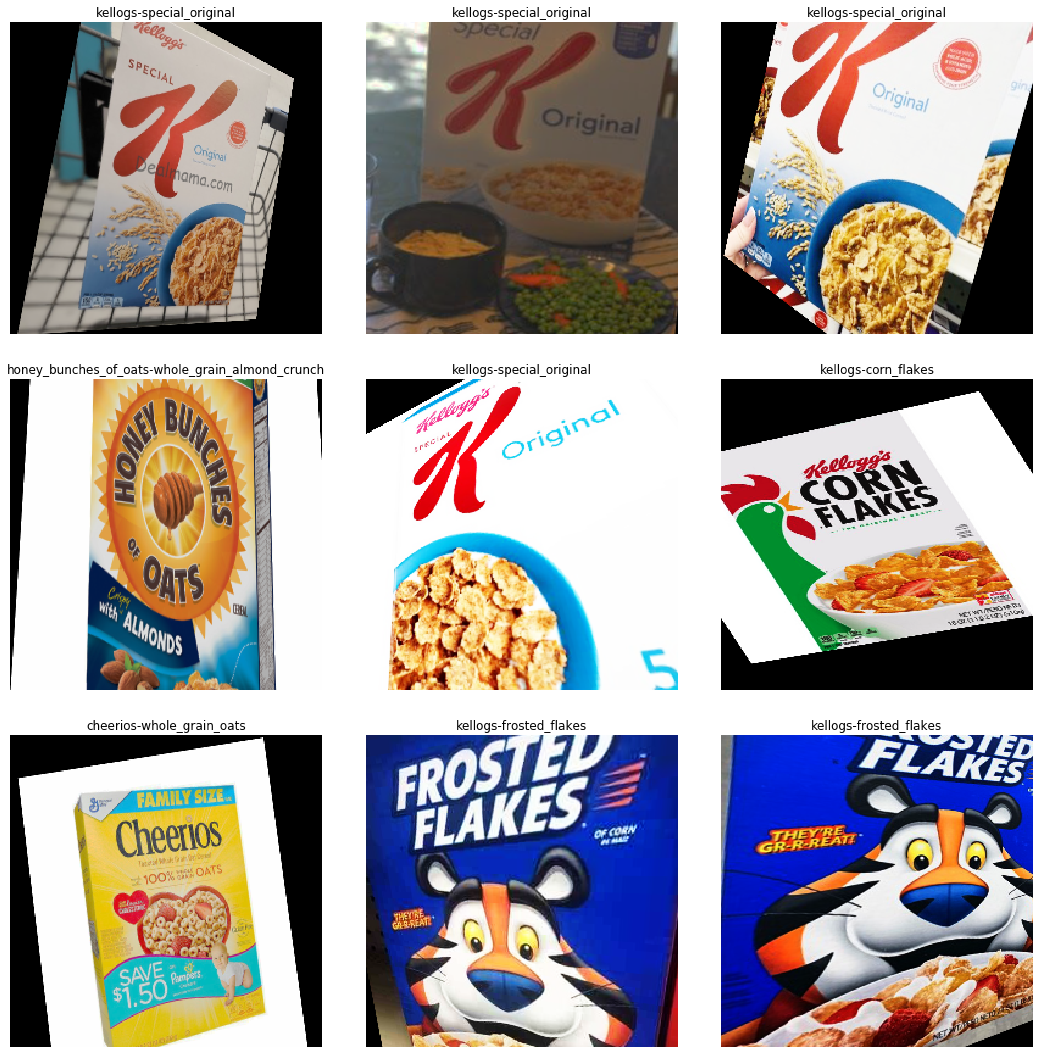

In [70]:
data.show_batch(rows=3, figsize=(15,15))

In [71]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [72]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.368818,4.836585,0.866667,00:14
1,2.600674,3.010139,0.711111,00:15
2,2.003005,1.977118,0.555556,00:14
3,1.632980,1.254245,0.444444,00:13


In [73]:
learn.save('stage-1')

In [74]:
learn.unfreeze()

In [75]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


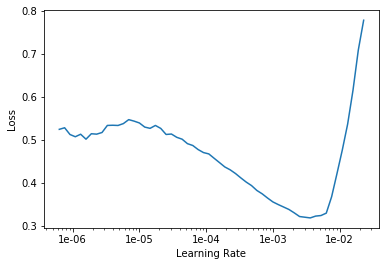

In [76]:
learn.recorder.plot()

In [86]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (183 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
cheerios-whole_grain_oats,cheerios-whole_grain_oats,cheerios-whole_grain_oats,cheerios-whole_grain_oats,cheerios-whole_grain_oats
Path: dataset/merged;

Valid: LabelList (45 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
kellogs-corn_flakes,honey_bunches_of_oats-whole_grain_almond_crunch,cheerios-honey_nut_oats,kellogs-special_original,kellogs-special_red_berries
Path: dataset/merged;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False

In [87]:
learn.fit_one_cycle(6, max_lr=1e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.673609,0.374401,0.111111,00:15
1,0.485676,0.217654,0.088889,00:17
2,0.502606,0.150428,0.066667,00:15
3,0.407795,0.176419,0.044444,00:15
4,0.355261,0.157827,0.044444,00:14
5,0.312920,0.122128,0.044444,00:14


In [88]:
learn.save('stage-2')

In [51]:
learn.load('stage-2');

/home/akshar/miniconda3/envs/dl/lib/python3.7/site-packages/fastai/train.py:200: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


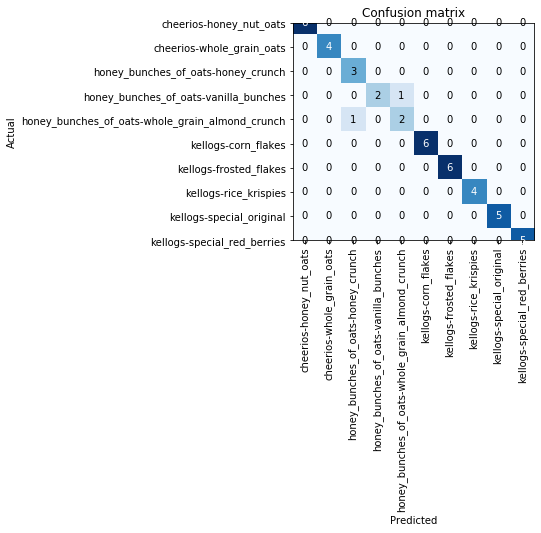

In [98]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [99]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [106]:
doc(interp.plot_multi_top_losses)

In [108]:
interp.plot_top_losses(2)

AttributeError: 'ImageList' object has no attribute 'cat_names'

In [90]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [91]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())